In [3]:
import requests
import csv
import pandas as pd
from bs4 import BeautifulSoup
url="https://results.eci.gov.in/PcResultGenJune2024/index.htm"
r=requests.get(url)
htmlcontent = r.content
print(html_content[:500].decode('utf-8'))

<!doctype html>
<html lang="en">

<head>
  <!-- Required meta tags -->
  <meta charset="utf-8"> 
    <meta name="viewport" content="width=device-width, initial-scale=1"> 
    <meta http-equiv='Content-Type' content='text/html; charset=UTF-8'>
    <meta http-equiv='X-UA-Compatible' content='IE=7'>
    <meta http-equiv='Cache-Control' content='no-cache, no-store, must-revalidate'>
    <meta http-equiv='Pragma' content='no-cache'>
    <meta http-equiv='Expires' content='0'>
    <meta ht


In [4]:
soup=BeautifulSoup(htmlcontent,'html.parser')
print(soup.prettify)

<bound method Tag.prettify of <!DOCTYPE html>

<html lang="en">
<head>
<!-- Required meta tags -->
<meta charset="utf-8"/>
<meta content="width=device-width, initial-scale=1" name="viewport"/>
<meta content="text/html; charset=utf-8" http-equiv="Content-Type"/>
<meta content="IE=7" http-equiv="X-UA-Compatible"/>
<meta content="no-cache, no-store, must-revalidate" http-equiv="Cache-Control"/>
<meta content="no-cache" http-equiv="Pragma"/>
<meta content="0" http-equiv="Expires"/>
<meta content="300" http-equiv="refresh"/>
<!-- Bootstrap CSS -->
<link href="css/bootstrap.min.css" rel="stylesheet"/>
<link href="css/custom.css" rel="stylesheet"/>
<link href="css/responsive.css" rel="stylesheet"/>
<link href="css/font.css" rel="stylesheet"/>
<link href="img/icons/favicon.ico" rel="shortcut icon" type="image/x-icon"/>
<title>Election Commission of India</title>
<style type="text/css">
</style>
<script>!function(a){var e="https://s.go-mpulse.net/boomerang/",t="addEventListener";if("False"=="Tr

In [5]:
title=soup.title
print(type(soup))
print(type(title))
print(type(title.string))
print(title)

<class 'bs4.BeautifulSoup'>
<class 'bs4.element.Tag'>
<class 'bs4.element.NavigableString'>
<title>Election Commission of India</title>


In [9]:
options = soup.find_all('option')
option_links = set()
states=set()

for link in options:
    # Check if 'value' attribute exists and is not None
    option_value = link.get('value')
    if option_value:
        link_text = f"https://results.eci.gov.in/PcResultGenJune2024/partywiseresult-{option_value}.htm"
        option_links.add(link_text)
        states.add(link.text.strip())

        print(link_text)


print(states)


https://results.eci.gov.in/PcResultGenJune2024/partywiseresult-U01.htm
https://results.eci.gov.in/PcResultGenJune2024/partywiseresult-S01.htm
https://results.eci.gov.in/PcResultGenJune2024/partywiseresult-S02.htm
https://results.eci.gov.in/PcResultGenJune2024/partywiseresult-S03.htm
https://results.eci.gov.in/PcResultGenJune2024/partywiseresult-S04.htm
https://results.eci.gov.in/PcResultGenJune2024/partywiseresult-U02.htm
https://results.eci.gov.in/PcResultGenJune2024/partywiseresult-S26.htm
https://results.eci.gov.in/PcResultGenJune2024/partywiseresult-U03.htm
https://results.eci.gov.in/PcResultGenJune2024/partywiseresult-S05.htm
https://results.eci.gov.in/PcResultGenJune2024/partywiseresult-S06.htm
https://results.eci.gov.in/PcResultGenJune2024/partywiseresult-S07.htm
https://results.eci.gov.in/PcResultGenJune2024/partywiseresult-S08.htm
https://results.eci.gov.in/PcResultGenJune2024/partywiseresult-U08.htm
https://results.eci.gov.in/PcResultGenJune2024/partywiseresult-S27.htm
https:

In [10]:
def state_cons(lnk):
    sp=BeautifulSoup(f"{lnk}",'html.parser')
    l=sp.find('span').get_text().split()
    constituency_number=(l[0])
    constituency_name=l[2]
    sn=sp.find('strong').get_text()
    state_name=sn[2:len(sn)-1]
    lst=[state_name, constituency_name, constituency_number]
    return lst

def constituency_details(url,h):
    res = requests.get(url)
    so = BeautifulSoup(res.content, 'html.parser')
    table = so.find('table')
    headers = ['state', 'constituency_name', 'constituency_number']
    thead = table.find('thead')
    if thead:
        for th in thead.find_all('th')[1:]:
            headers.append(th.text.strip())
    
    rows = []
    tbody = table.find('tbody')
    if tbody:
        for tr in tbody.find_all('tr'):
            cells = tr.find_all('td')[1:]
            if len(cells) > 0:
                cells_text = [cell.text.strip().replace('\n', ' ') for cell in cells]
                row = h + cells_text[:len(headers)-3]
                rows.append(row)
    
    for row in rows:
        while len(row) < len(headers):
            row.append('')
    
    df = pd.DataFrame(rows, columns=headers)
    return df

count=0
cl=set()
for url in option_links:
    re=requests.get(url)
    statehtml=re.content
    s=BeautifulSoup(statehtml,'html.parser')
    c=s.find_all('option')

    for l in c:
        option_value = l.get('value')
        if option_value:
              link_text = f"https://results.eci.gov.in/PcResultGenJune2024/Constituencywise{option_value}.htm"
              count=count+1
              cl.add(link_text)

soc=list(cl)
lst=[]
c=0
dfs=[]
for i in soc:
    s = requests.get(i)
    sp=BeautifulSoup(s.content,'html.parser')
    name_con=sp.find('h2')
    lst.append(name_con)
    headers=state_cons(name_con)
    c=c+1
    df=constituency_details(i,headers)
    dfs.append(df)

print(c)
new_df=pd.concat(dfs,axis=0,ignore_index=True)

print(dfs[0])


543
     state constituency_name constituency_number                   Candidate  \
0   Punjab         Jalandhar                   4      CHARANJIT SINGH CHANNI   
1   Punjab         Jalandhar                   4          SUSHIL KUMAR RINKU   
2   Punjab         Jalandhar                   4            PAWAN KUMAR TINU   
3   Punjab         Jalandhar                   4       MOHINDER SINGH KAYPEE   
4   Punjab         Jalandhar                   4    ADVOCATE BALWINDER KUMAR   
5   Punjab         Jalandhar                   4       SARABJIT SINGH KHALSA   
6   Punjab         Jalandhar                   4  MASTER PARSHOTAM LAL BILGA   
7   Punjab         Jalandhar                   4           IQBAL CHAND MATTU   
8   Punjab         Jalandhar                   4          NEETU SHATTRA WALA   
9   Punjab         Jalandhar                   4               AMRISH BHAGAT   
10  Punjab         Jalandhar                   4         GURDEEP SINGH BITTU   
11  Punjab         Jalandhar        

In [11]:
new_df.to_csv('a1.csv', index=False)
print(c)
new_df = pd.concat(dfs, axis=0, ignore_index=True)
print(dfs[0])
print(new_df)
new_df.to_csv('a2.csv', index=False)

543
     state constituency_name constituency_number                   Candidate  \
0   Punjab         Jalandhar                   4      CHARANJIT SINGH CHANNI   
1   Punjab         Jalandhar                   4          SUSHIL KUMAR RINKU   
2   Punjab         Jalandhar                   4            PAWAN KUMAR TINU   
3   Punjab         Jalandhar                   4       MOHINDER SINGH KAYPEE   
4   Punjab         Jalandhar                   4    ADVOCATE BALWINDER KUMAR   
5   Punjab         Jalandhar                   4       SARABJIT SINGH KHALSA   
6   Punjab         Jalandhar                   4  MASTER PARSHOTAM LAL BILGA   
7   Punjab         Jalandhar                   4           IQBAL CHAND MATTU   
8   Punjab         Jalandhar                   4          NEETU SHATTRA WALA   
9   Punjab         Jalandhar                   4               AMRISH BHAGAT   
10  Punjab         Jalandhar                   4         GURDEEP SINGH BITTU   
11  Punjab         Jalandhar        

In [12]:
# EXAMPLE
UP_df = new_df[new_df['state'] == 'Uttar Pradesh']

# Count the number of rows
UP_count = UP_df.shape[0]

# Print the count
print(f"Number of rows-UP: {UP_count}")

UP_df

Number of rows-UP: 931


,state,constituency_name,constituency_number,Candidate,Party,EVM Votes,Postal Votes,Total Votes,% of Votes
107,Uttar Pradesh,Shahjahanpur,27,ARUN KUMAR SAGAR,Bharatiya Janata Party,591500,1218,592718,47.5
108,Uttar Pradesh,Shahjahanpur,27,JYOTSNA GOND,Samajwadi Party,534720,2619,537339,43.06
109,Uttar Pradesh,Shahjahanpur,27,DOD RAM VERMA,Bahujan Samaj Party,91302,408,91710,7.35
110,Uttar Pradesh,Shahjahanpur,27,KIRAN,Rashtriya Sanatan Party,6587,1,6588,0.53
111,Uttar Pradesh,Shahjahanpur,27,SHIV KUMAR,Independent,2805,-,2805,0.22
...,...,...,...,...,...,...,...,...,...
8897,Uttar Pradesh,Firozabad,20,UPENDRA SINGH,Bharatiya Kisan Parivartan Party,7111,8,7119,0.64
8898,Uttar Pradesh,Firozabad,20,RASHMI KANT,Parivartan Samaj Party,2927,3,2930,0.26
8899,Uttar Pradesh,Firozabad,20,PREM DUTT,Rashtra Uday Party,2876,2,2878,0.26
8900,Uttar Pradesh,Firozabad,20,RAJVEER,Independent,1367,13,1380,0.12


In [13]:
new_df = new_df.applymap(lambda s: s.lower() if type(s) == str else s)
postal_votes_null = new_df[new_df['EVM Votes'].isnull()]

# You can print or save these DataFrames as needed
print("Rows with null 'postal votes':")
print(postal_votes_null)

new_df

Rows with null 'postal votes':
Empty DataFrame
Columns: [state, constituency_name, constituency_number, Candidate, Party, EVM Votes, Postal Votes, Total Votes, % of Votes]
Index: []


,state,constituency_name,constituency_number,Candidate,Party,EVM Votes,Postal Votes,Total Votes,% of Votes
0,punjab,jalandhar,4,charanjit singh channi,indian national congress,389509,544,390053,39.43
1,punjab,jalandhar,4,sushil kumar rinku,bharatiya janata party,213702,358,214060,21.64
2,punjab,jalandhar,4,pawan kumar tinu,aam aadmi party,208549,340,208889,21.12
3,punjab,jalandhar,4,mohinder singh kaypee,shiromani akali dal,67811,100,67911,6.87
4,punjab,jalandhar,4,advocate balwinder kumar,bahujan samaj party,64856,85,64941,6.57
...,...,...,...,...,...,...,...,...,...
8897,uttar pradesh,firozabad,20,upendra singh,bharatiya kisan parivartan party,7111,8,7119,0.64
8898,uttar pradesh,firozabad,20,rashmi kant,parivartan samaj party,2927,3,2930,0.26
8899,uttar pradesh,firozabad,20,prem dutt,rashtra uday party,2876,2,2878,0.26
8900,uttar pradesh,firozabad,20,rajveer,independent,1367,13,1380,0.12


VISUALISATION USING SEABORN-

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

file_path = 'a1.csv'
election_data = pd.read_csv(file_path)


def clean_votes(column):
    column = column.replace(',', '', regex=True)
    column = pd.to_numeric(column, errors='coerce')
    return column

election_data['Total Votes'] = clean_votes(election_data['Total Votes'])
election_data['EVM Votes'] = clean_votes(election_data['EVM Votes'])
election_data['Postal Votes'] = clean_votes(election_data['Postal Votes'])
election_data['% of Votes'] = election_data['% of Votes'].replace(['%', '-'], '', regex=True)
election_data['% of Votes'] = pd.to_numeric(election_data['% of Votes'], errors='coerce')

election_data = election_data.dropna(subset=['Total Votes', 'EVM Votes', 'Postal Votes', '% of Votes'])

top_50_parties = election_data.groupby('Party')['Total Votes'].sum().sort_values(ascending=False).head(50).index
top_50_data = election_data[election_data['Party'].isin(top_50_parties)]

C:\Users\archi\AppData\Local\Temp\ipykernel_21904\4227246237.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Total Votes', y='Candidate', data=last_10_candidates, palette='viridis')


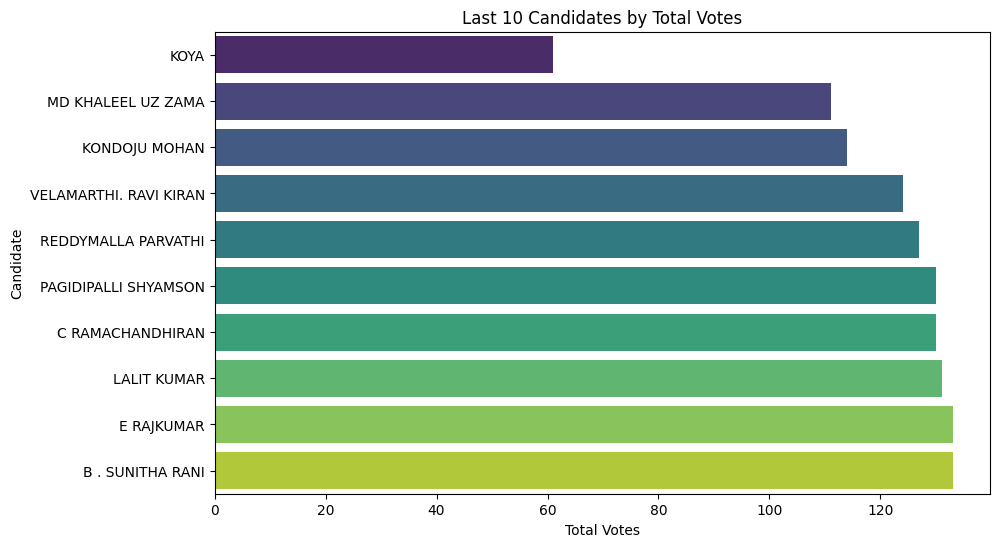

In [16]:
last_10_candidates = election_data.sort_values(by='Total Votes', ascending=True).head(10)
plt.figure(figsize=(10, 6))
sns.barplot(x='Total Votes', y='Candidate', data=last_10_candidates, palette='viridis')
plt.title('Last 10 Candidates by Total Votes')
plt.xlabel('Total Votes')
plt.ylabel('Candidate')
plt.show()

C:\Users\archi\AppData\Local\Temp\ipykernel_21904\308185263.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Total Votes', y='Candidate', data=top_10_candidates, palette='viridis')


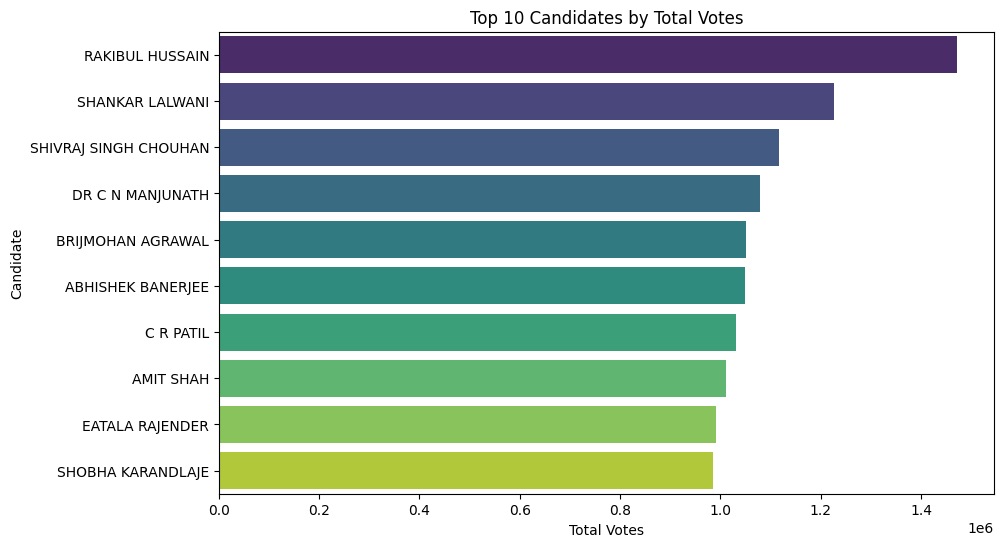

In [18]:
top_10_candidates = election_data.sort_values(by='Total Votes', ascending=False).head(10)
plt.figure(figsize=(10, 6))
sns.barplot(x='Total Votes', y='Candidate', data=top_10_candidates, palette='viridis')
plt.title('Top 10 Candidates by Total Votes')
plt.xlabel('Total Votes')
plt.ylabel('Candidate')
plt.show()

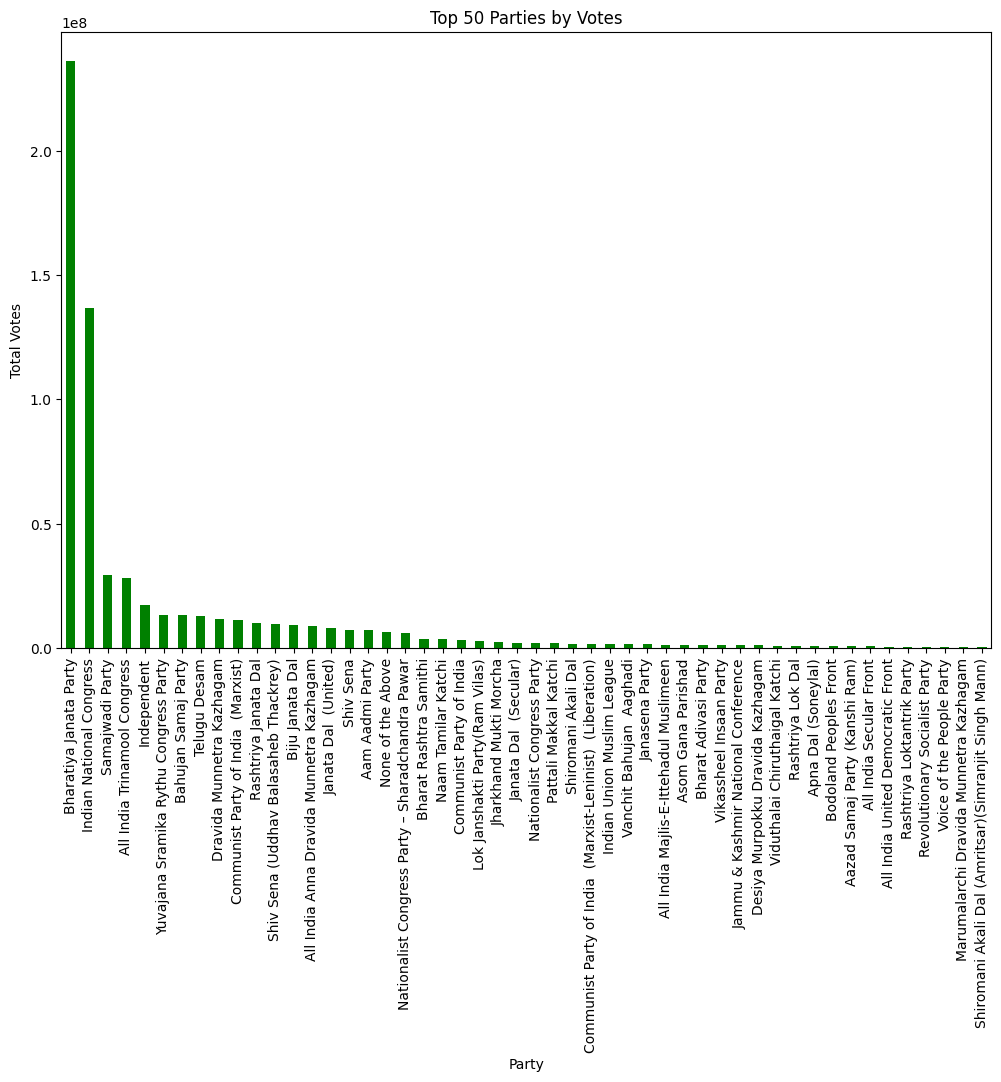

In [31]:
party_votes = top_50_data.groupby('Party')['Total Votes'].sum().sort_values(ascending=False)
plt.figure(figsize=(12, 8))
party_votes.plot(kind='bar', color='green')
plt.title('Top 50 Parties by Votes')
plt.xlabel('Party')
plt.ylabel('Total Votes')
plt.show()

In [23]:
lowest_turnout = election_data.groupby('constituency_name')['Total Votes'].sum().sort_values(ascending=True).head(1)
print("Constituency with Lowest Voter Turnout:", lowest_turnout)

Constituency with Lowest Voter Turnout: constituency_name
Lakshadweep    49200.0
Name: Total Votes, dtype: float64


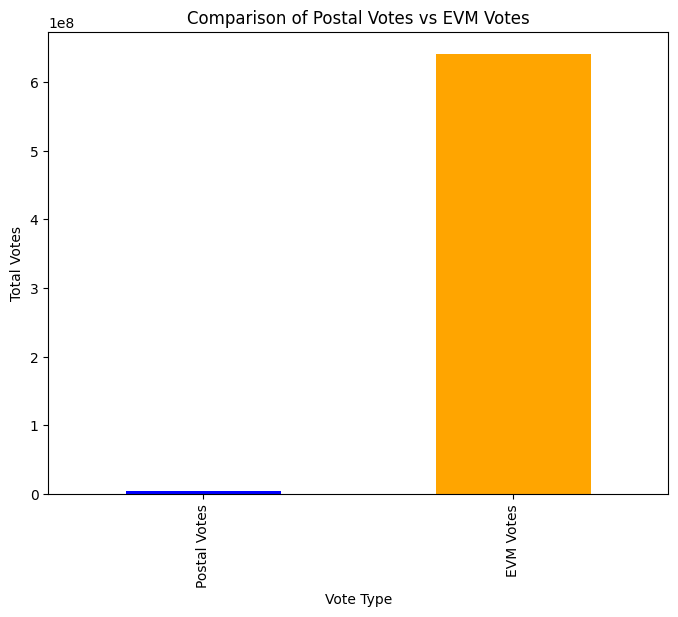

In [26]:
evm_vs_postal = election_data[['Postal Votes', 'EVM Votes']].sum()
plt.figure(figsize=(8, 6))
evm_vs_postal.plot(kind='bar', color=['blue', 'orange'])
plt.title('Comparison of Postal Votes vs EVM Votes')
plt.xlabel('Vote Type')
plt.ylabel('Total Votes')
plt.show()

C:\Users\archi\AppData\Local\Temp\ipykernel_21904\3615416741.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='state', data=winning_candidates_top_50, order=winning_candidates_top_50['state'].value_counts().index, palette='coolwarm')


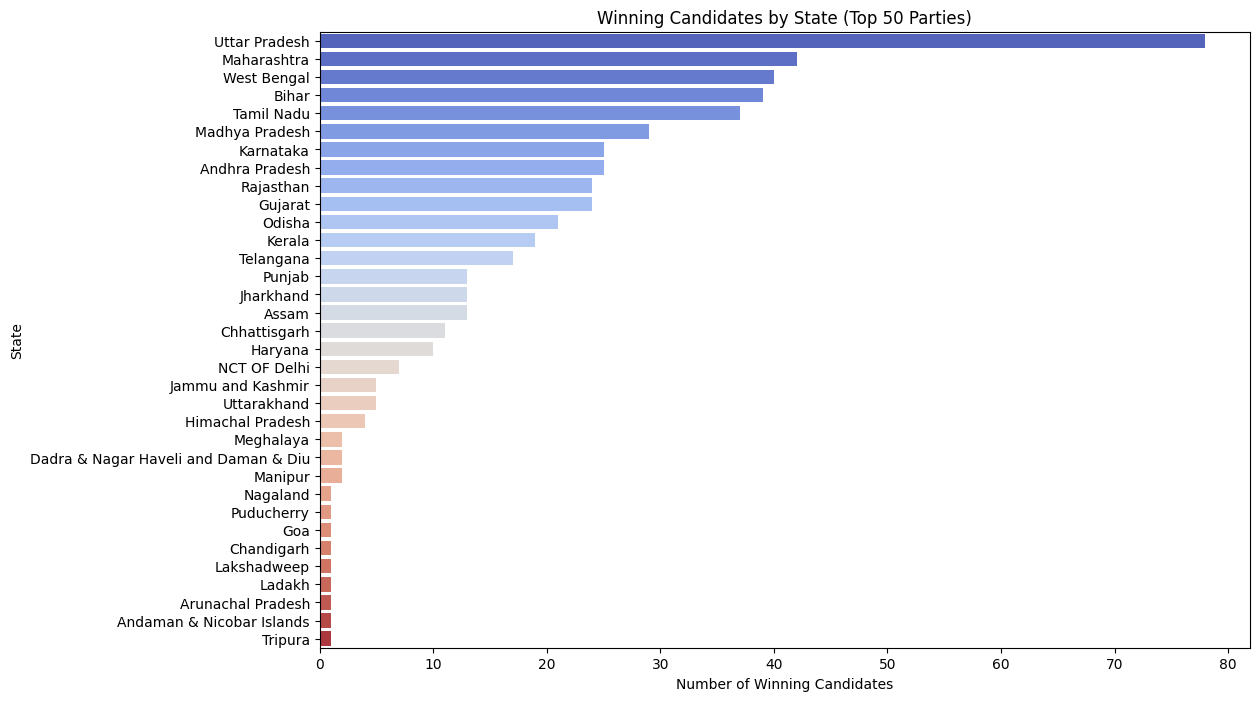

In [27]:
winning_candidates = election_data.loc[election_data.groupby('constituency_name')['% of Votes'].idxmax()]
winning_candidates_top_50 = winning_candidates[winning_candidates['Party'].isin(top_50_parties)]
plt.figure(figsize=(12, 8))
sns.countplot(y='state', data=winning_candidates_top_50, order=winning_candidates_top_50['state'].value_counts().index, palette='coolwarm')
plt.title('Winning Candidates by State (Top 50 Parties)')
plt.xlabel('Number of Winning Candidates')
plt.ylabel('State')
plt.show()

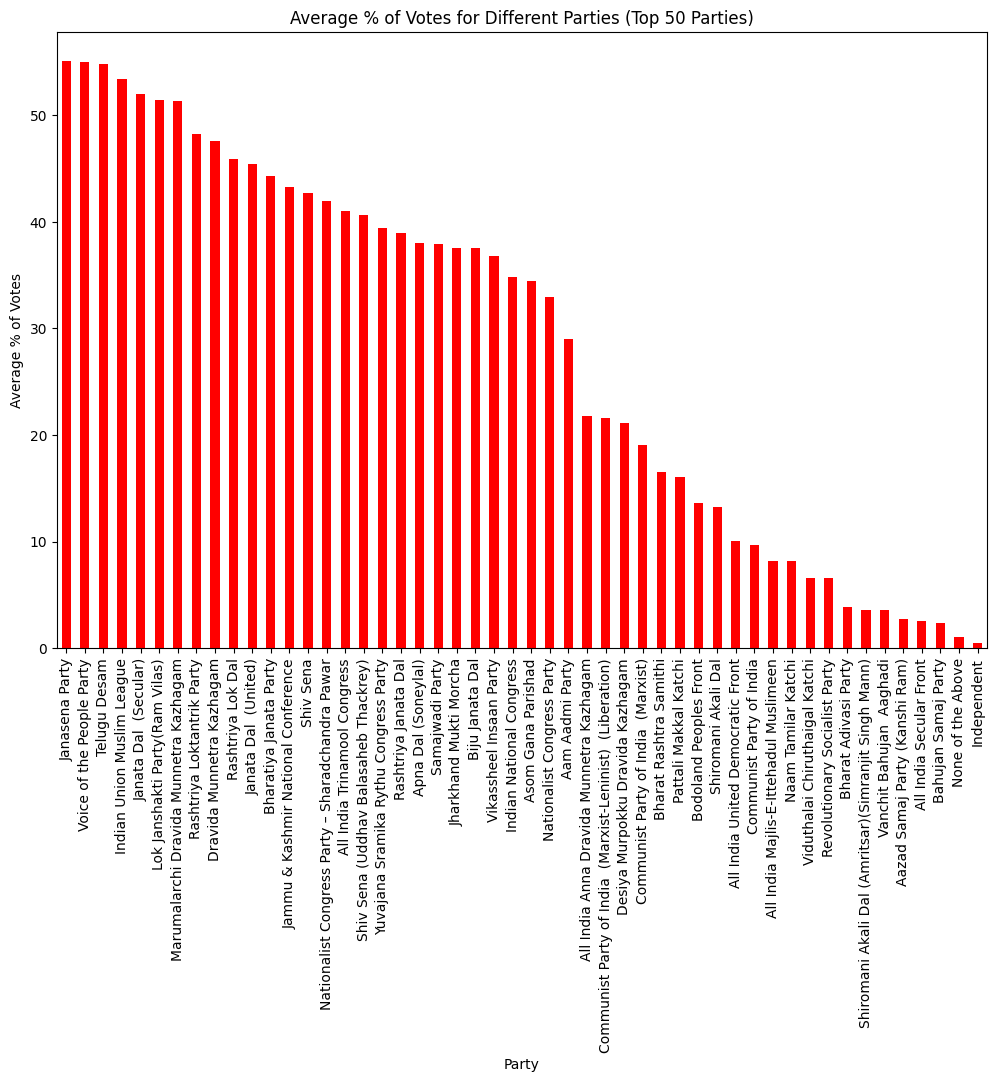

In [30]:
average_vote_percentage = top_50_data.groupby('Party')['% of Votes'].mean().sort_values(ascending=False)
plt.figure(figsize=(12, 8))
average_vote_percentage.plot(kind='bar', color='red')
plt.title('Average % of Votes for Different Parties (Top 50 Parties)')
plt.xlabel('Party')
plt.ylabel('Average % of Votes')
plt.show()

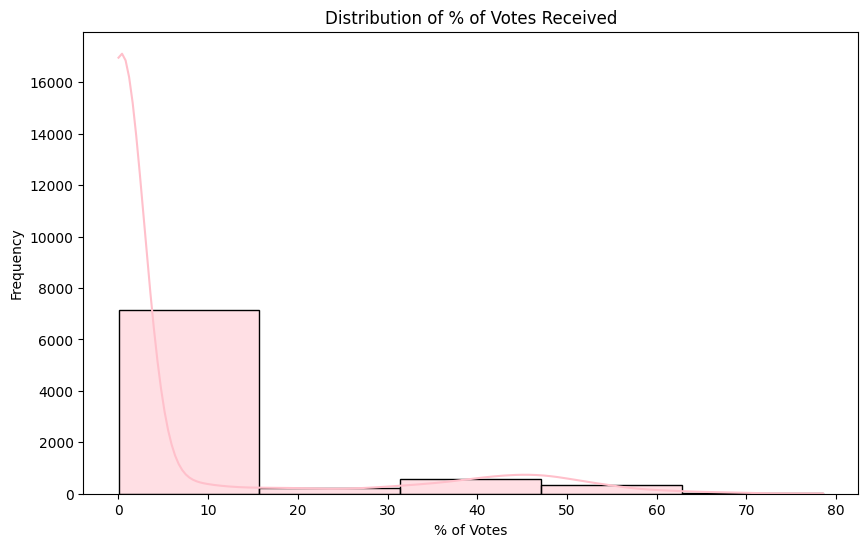

In [38]:
plt.figure(figsize=(10, 6))
sns.histplot(election_data['% of Votes'], bins=5, kde=True, color='pink')
plt.title('Distribution of % of Votes Received')
plt.xlabel('% of Votes')
plt.ylabel('Frequency')
plt.show()

C:\Users\archi\AppData\Local\Temp\ipykernel_21904\2791663387.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Vote Margin', y='constituency_name', data=least_competitive, palette='inferno')


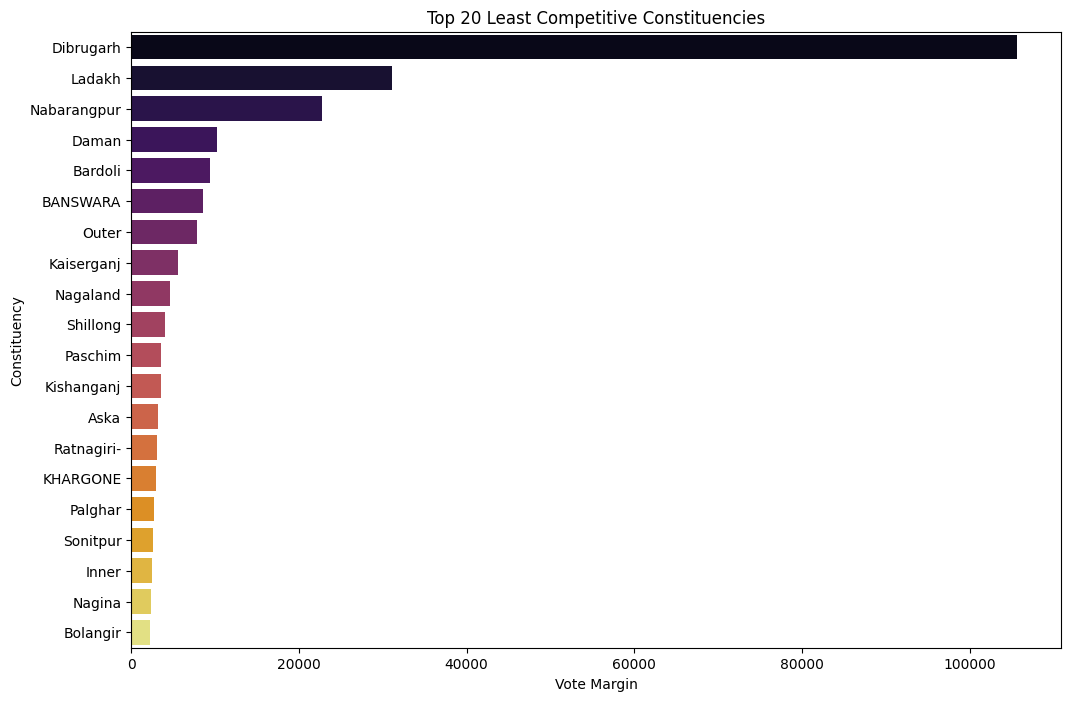

In [41]:
least_competitive = election_data.sort_values(by=['constituency_name', 'Total Votes']).groupby('constituency_name').apply(lambda x: x.head(2)).reset_index(drop=True)
least_competitive['Vote Margin'] = least_competitive.groupby('constituency_name')['Total Votes'].diff().abs()
least_competitive = least_competitive.groupby('constituency_name').apply(lambda x: x.nlargest(1, 'Vote Margin')).reset_index(drop=True).sort_values(by='Vote Margin', ascending=False).head(20)
plt.figure(figsize=(12, 8))
sns.barplot(x='Vote Margin', y='constituency_name', data=least_competitive, palette='inferno')
plt.title('Top 20 Least Competitive Constituencies')
plt.xlabel('Vote Margin')
plt.ylabel('Constituency')
plt.show()

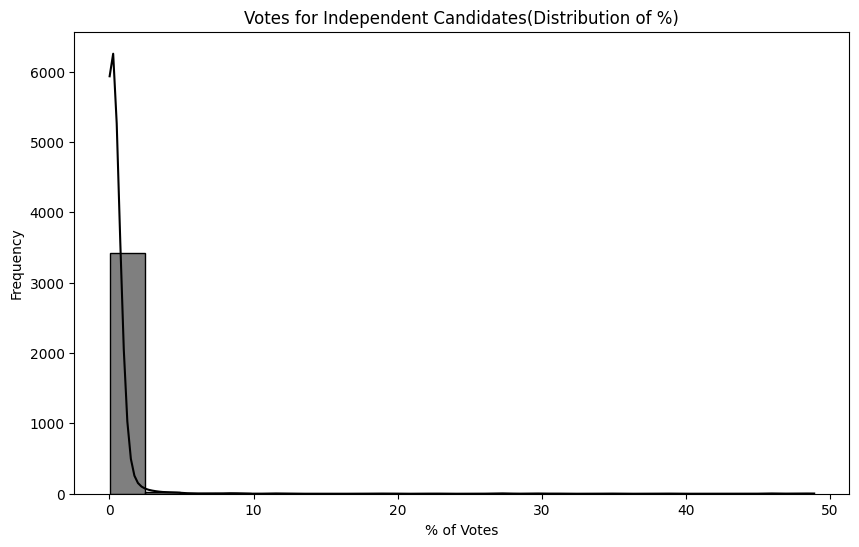

In [45]:
independent_candidates = election_data[election_data['Party'] == 'Independent']
plt.figure(figsize=(10, 6))
sns.histplot(independent_candidates['% of Votes'], bins=20, kde=True, color='black')
plt.title('Votes for Independent Candidates(Distribution of %)')
plt.xlabel('% of Votes')
plt.ylabel('Frequency')
plt.show()

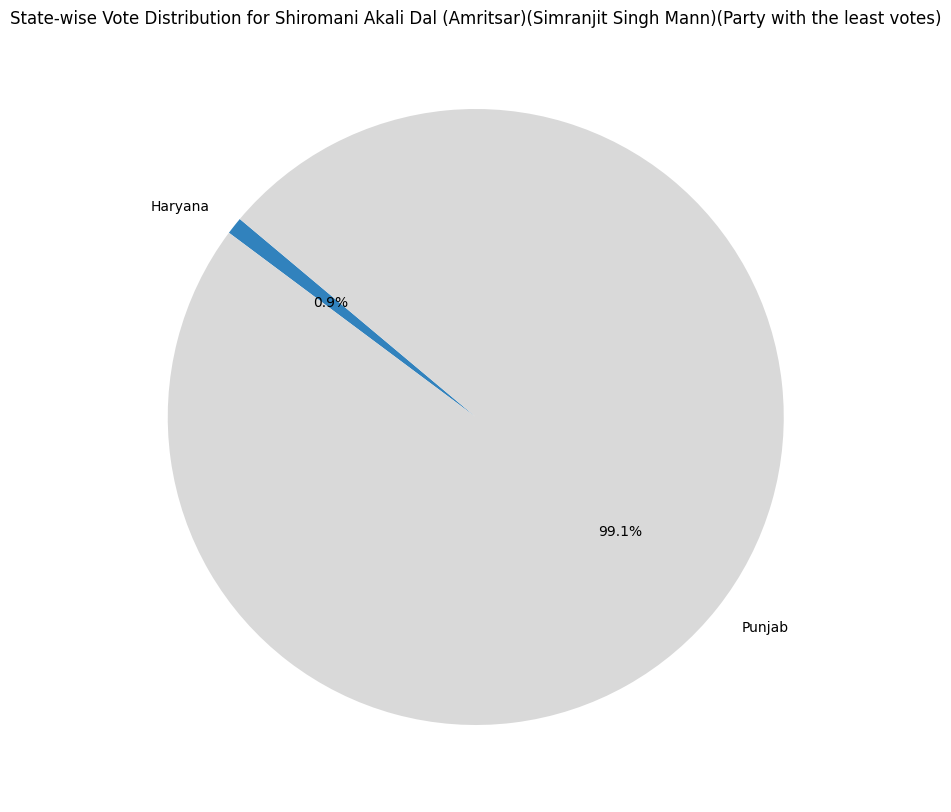

In [49]:
lowest_party = party_votes.idxmin()
lowest_party_data = election_data[election_data['Party'] == lowest_party]
state_votes = lowest_party_data.groupby('state')['Total Votes'].sum()

plt.figure(figsize=(10, 10))
state_votes.plot(kind='pie', autopct='%1.1f%%', startangle=140, colormap='tab20c')
plt.title(f'State-wise Vote Distribution for {lowest_party}(Party with the least votes)')
plt.ylabel('')
plt.show()

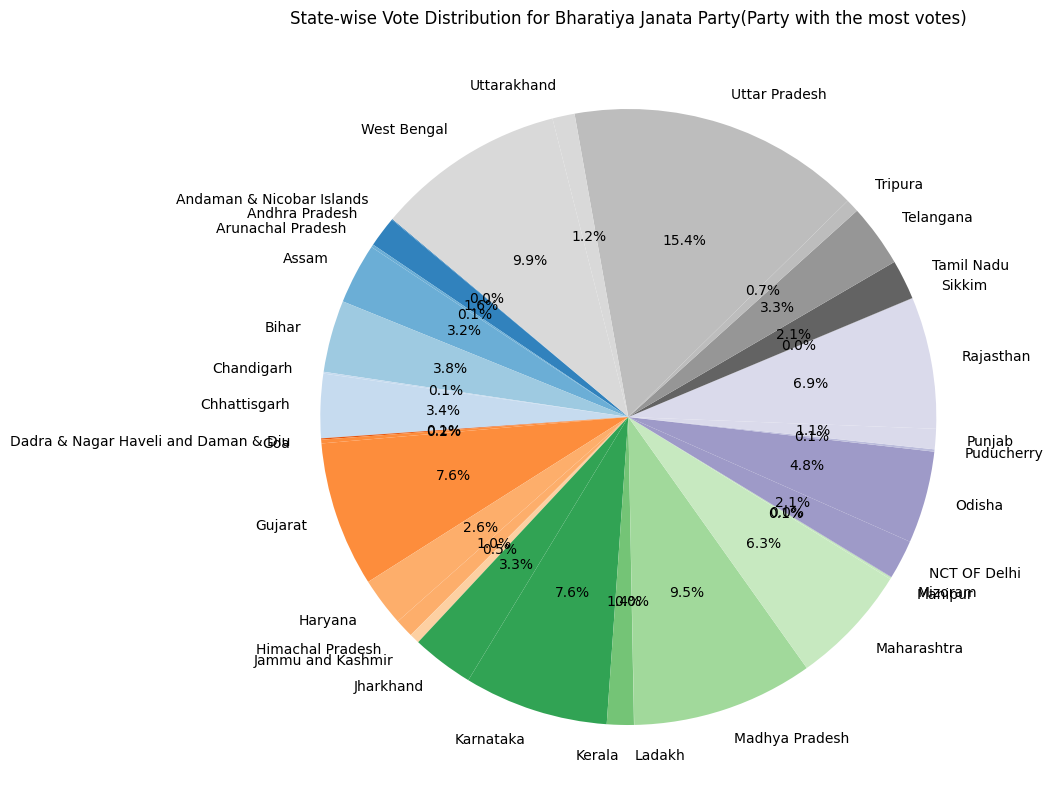

In [50]:
top_party = party_votes.idxmax()
top_party_data = election_data[election_data['Party'] == top_party]
state_votes = top_party_data.groupby('state')['Total Votes'].sum()

plt.figure(figsize=(10, 10))
state_votes.plot(kind='pie', autopct='%1.1f%%', startangle=140, colormap='tab20c')
plt.title(f'State-wise Vote Distribution for {top_party}(Party with the most votes)')
plt.ylabel('')
plt.show()

In [51]:
election_data.to_csv('election_main.csv', index=False)
def is_numeric(value):
    try:
        # Handle both string and float values
        if isinstance(value, float) or isinstance(value, int):
            return True
        elif isinstance(value, str):
            float(value.replace(',', ''))
            return True
        else:
            return False
    except ValueError:
        return False

non_numerical_total_votes = election_data[~election_data['Total Votes'].apply(is_numeric)]['Total Votes'].unique()

non_numerical_total_votes

array([], dtype=float64)

In [52]:
import pandas as pd

df = pd.read_csv('a1.csv')

df.replace('-', 0, inplace=True)

df.to_csv('final_election.csv', index=False)
last_four_columns = df.iloc[:, -4:]

# Check for non-numeric values
non_numeric = last_four_columns.apply(lambda x: pd.to_numeric(x, errors='coerce').isna().any())

# Output the result
if non_numeric.any():
    print("Non-numeric values found in the last four columns:")
    print(non_numeric[non_numeric].index.tolist())
else:
    print("All values in the last four columns are numeric or floats.")

All values in the last four columns are numeric or floats.
